In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
cancer=pd.read_csv(r'C:\Users\mutho\OneDrive\Documents\WINTER SEMESTER WORK 2022\STATISTICAL PREDICTION MODEL WORK\Assignment #2 – Logistical Regression attached files Feb 11, 2022 1149 AM\cancer.csv')
cancer

,id,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
#Dropping ID column
cancer=cancer.drop('id',axis=1)

#Show Key Statistics
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
UofCSize,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
UofCShape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
SECSize,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


Class Split
2    444
4    239
Name: Class, dtype: int64


Text(0, 0.5, 'Count')

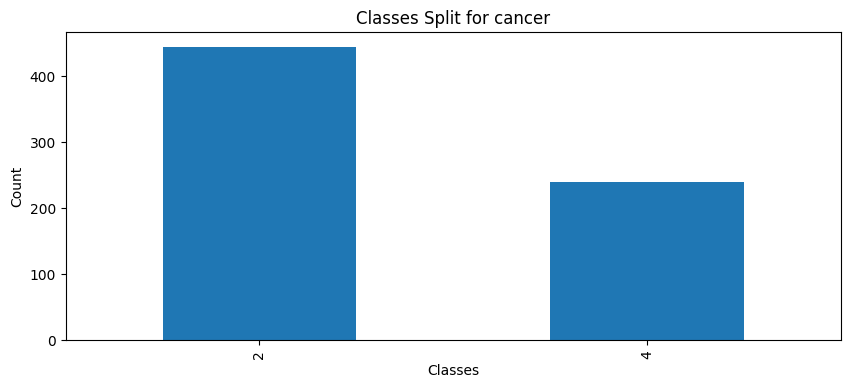

In [4]:
#Class Balance
print('Class Split')
print(cancer['Class'].value_counts())
cancer['Class'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for cancer')
plt.xlabel('Classes')
plt.ylabel('Count')

In [5]:
#Create x and y variables
x = cancer.drop('Class', axis=1).to_numpy()
Y = cancer['Class'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.20,stratify=Y,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Model
from sklearn.linear_model import LogisticRegression

In [6]:
#Base Logistical Regression Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('LogReg', LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=100,max_iter=1000))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))


Estimator: LogReg
[[89  0]
 [ 3 45]]
              precision    recall  f1-score   support

           2       0.97      1.00      0.98        89
           4       1.00      0.94      0.97        48

    accuracy                           0.98       137
   macro avg       0.98      0.97      0.98       137
weighted avg       0.98      0.98      0.98       137

